# Time Resampling

Let's learn how to sample time series data! This will be useful later on in the course!

In [6]:
import pandas as pd
%matplotlib inline

## Import the data
For this exercise we'll look at Starbucks stock data from 2015 to 2018 which includes daily closing prices and trading volumes.

In [7]:
df1 = pd.read_csv('E:\Python\TimeSeriesAnalysis\TSA_FINAL\Time seriesData\starbucks.csv')
df1.head()
df1.dtypes

Date       object
Close     float64
Volume      int64
dtype: object

In [8]:
df1.set_index("Date",inplace = True)

In [9]:
df1.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [10]:
df = pd.read_csv('E:\Python\TimeSeriesAnalysis\TSA_FINAL\Time seriesData\starbucks.csv', index_col='Date', parse_dates=True)

Note: the above code is a faster way of doing the following:
<pre>df = pd.read_csv('../Data/starbucks.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)</pre>

In [11]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## resample()

A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

In [12]:
# Our index
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [8]:
# Yearly Means
df.resample(rule='A').mean(['Profit', 'Sales'])

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [13]:
# Yearly Means
df.resample(rule='Q').mean()

,Close,Volume
Date,,
2015-03-31,42.033705,1.005831e+07
2015-06-30,47.622476,7.375698e+06
2015-09-30,52.742539,9.206285e+06
2015-12-31,57.498228,8.002620e+06
2016-03-31,55.171702,1.093832e+07
2016-06-30,54.050434,8.582716e+06
2016-09-30,53.350578,8.996589e+06
2016-12-31,53.040917,8.753118e+06
2017-03-31,54.447013,9.846263e+06


Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), and reports the result as the last day of that year.

### Custom Resampling Functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [13]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[0]

In [15]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [10]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


### Plotting

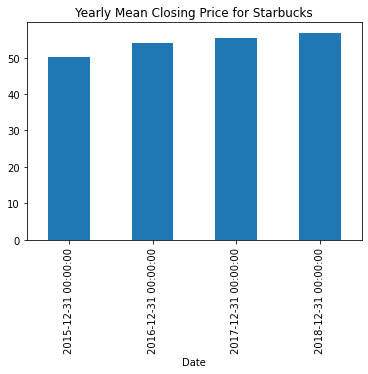

In [13]:
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks');

Pandas treats each sample as its own trace, and by default assigns different colors to each one. If you want, you can pass a <strong>color</strong> argument to assign your own color collection, or to set a uniform color. For example, <tt>color='#1f77b4'</tt> sets a uniform "steel blue" color.

Also, the above code can be broken into two lines for improved readability.

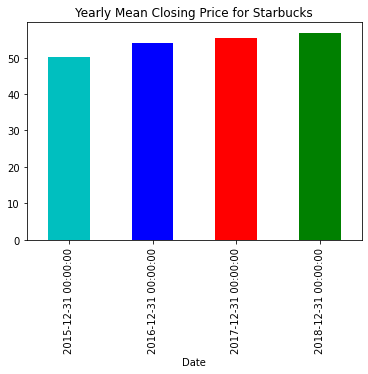

In [15]:
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').mean().plot.bar(title=title,color=['c',"b",'r','g']);

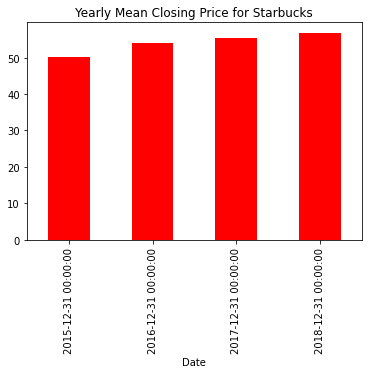

In [16]:
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').mean().plot.bar(title=title,color=['r']);

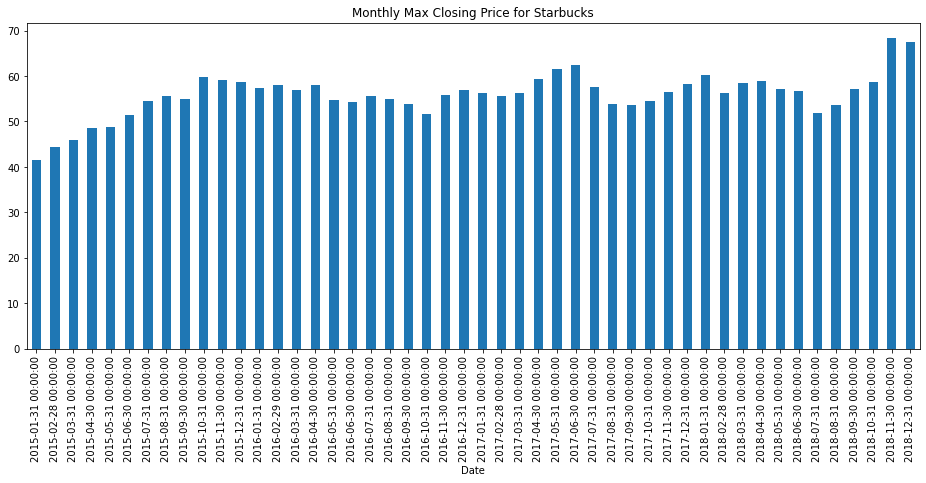

In [32]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

That is it! Up next we'll learn about time shifts!